['383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524']
[10, 

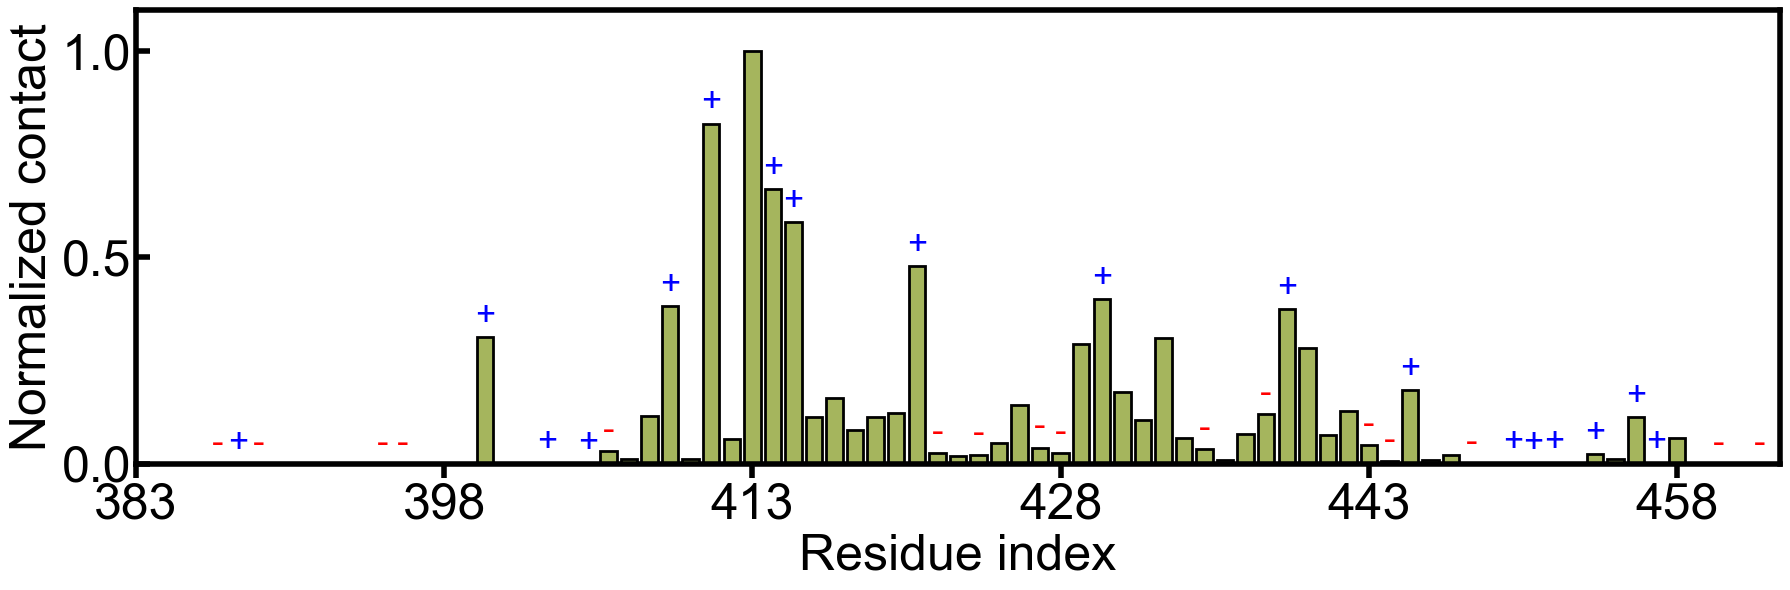

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from Bio.PDB.PDBParser import PDBParser

# 设置全局样式，符合 Nature 风格
plt.rcParams.update({
    'font.family': 'Arial',  # 设置字体
    'axes.titlesize': 36,  # 标题字体大小
    'axes.labelsize': 36,  # 坐标轴标签字体大小
    'xtick.labelsize': 36,  # X轴刻度字体大小
    'ytick.labelsize': 36,  # Y轴刻度字体大小
    'legend.fontsize': 36,  # 图例字体大小
    'figure.figsize': (18, 6),  # 图像大小，调整为更平衡
    'axes.linewidth': 4,  # 坐标轴线宽
    'xtick.major.size': 10, # x 轴主刻度长度
    'ytick.major.size': 10, # y 轴主刻度长度
    'xtick.minor.size': 5, # x 轴次刻度长度
    'ytick.minor.size': 5, # y 轴主刻度长度
    'xtick.major.width': 4, # x 轴主刻度线宽
    'ytick.major.width': 4, # y 轴主刻度线宽
    'xtick.minor.width': 3, # x 轴次刻度线宽
    'ytick.minor.width': 3, # y 轴主刻度线宽
    'axes.grid': False,  # 关闭背景网格
})


def extract_protein_info_from_pdb(file_path):
    protein_info = {}
    
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', file_path)
    
    for model in structure:
        for chain in model:
            if chain.id == 'B':
                for residue in chain:
                    res_id = residue.id[1]
                    res_name = residue.get_resname()
                    if res_id not in protein_info:
                        protein_info[res_id] = res_name
    return protein_info

# 读取xvg文件的数据
def read_xvg_data(file_paths):
    x_data = []
    y_data = []
    
    data1 = np.loadtxt(file_paths[0], comments=['#', '@'])
    data2 = np.loadtxt(file_paths[1], comments=['#', '@'])
    data3 = np.loadtxt(file_paths[2], comments=['#', '@'])

    data = np.column_stack((data1[:,1],data2[:,1],data3[:,1]))
    y_mean=np.mean(data, axis=1)
    y_max=np.max(y_mean)
    y_data = y_mean/y_max
    print(y_data.shape)
    x_data = data1[:,0]
    print(x_data.shape)
    
    return x_data, y_data

# 筛选负电荷残基
def get_negative_charged_residues(protein_info):
    negative_charges = []
    for res_id, res_name in protein_info.items():
        if res_name in ['ASP', 'GLU']:  # 筛选 Asp 和 Glu
            negative_charges.append(int(res_id))
    return negative_charges

# 筛选正电荷残基
def get_positive_charged_residues(protein_info):
    positive_charges = []
    for res_id, res_name in protein_info.items():
        if res_name in ['LYS', 'ARG', 'HIS']:  # 筛选 Lys、Arg 和 His
            positive_charges.append(int(res_id))
    return positive_charges

# 绘制柱状图
def plot_bar_chart(x_data, y_data):
    fig, ax = plt.subplots() # 设置图像大小，横向长度为12英寸
    width = 0.8 # 设置柱子宽度
    bar_color = '#A5B55D'  # 设置柱子颜色
    
    ax.bar(x_data, y_data, width=width, color=bar_color,
       edgecolor='black', linewidth=2)
    ax.set_xlabel('Residue index')
    ax.set_ylabel('Normalized contact')
    #ax.set_title('氨基酸序号与接触数目的柱状图', fontsize=16)

   # 设置x轴标签
    ax.set_xticks(np.arange(0, len(resi_info), 15))  # 每隔10个绘制一个标签
    ax.set_xticklabels(resi_info[::15], rotation=0)  # 每隔10个标签显示一次

        # 标记负电荷残基
    for i in negative_charges:
        if i - 6 < 80:  # 确保索引不超出范围
            ax.text(x_data[i-6], y_data[i-6] + 0.01, '-', ha='center', va='bottom', fontsize=25, color='red')

    # 标记正电荷残基
    for i in positive_charges:
        if i - 6 < 80:  # 确保索引不超出范围
            ax.text(x_data[i-6], y_data[i-6] + 0.01, '+', ha='center', va='bottom', fontsize=25, color='blue')

    ax.tick_params(axis='x', which='major', direction='out')
    ax.tick_params(axis='y', which='major', direction='in')
    plt.xlim(0, 80)  # 设置 x 轴范围
    plt.ylim(0, 1.1)  # 调整 y 轴范围，留出一些空间显示符号
    plt.yticks(np.arange(0, 1.1, 0.5))  # 设置 y 轴刻度
    plt.tight_layout()
    plt.savefig('each_resi_contact.png', dpi=300)  # 保存图像
    plt.show()


negative_charges = get_negative_charged_residues(protein_info)
positive_charges = get_positive_charged_residues(protein_info)

pdb_file_path = "chainID.pdb"
protein_info = extract_protein_info_from_pdb(pdb_file_path)
# 创建一个空数组
resi_info = []
# 设置计数器
count = 0
# 遍历字典中的元素，并将其添加到数组中
for key, value in protein_info.items():
    resi_info.append(f"{int(key)+377}")
    count += 1
    if count == 142:
        break

# 打印数组
print(resi_info)
print(negative_charges)
print(positive_charges)

file_paths = ["1/SUM.xvg","2/SUM.xvg","3/SUM.xvg"] # 请将这里替换为你的xvg文件路径
x_data, y_data = read_xvg_data(file_paths)
plot_bar_chart(resi_info, y_data)